[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [2]:
import requests

## Список объектов

In [ ]:

offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()

# Данные по определенному объекту

In [ ]:

url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

In [1]:

#####

In [3]:
offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()
objects_list = objects_data.get('data').get('list')
Allobjids = [x.get('objId') for x in objects_list]
Allobjids[:10]

[13383, 13398, 13397, 13399, 36912, 10891, 8809, 8810, 39176, 39175]

In [4]:
len(Allobjids)

1000

In [5]:
### One object full data

In [6]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/13383'

res = requests.get(url)
object_data = res.json()

In [7]:
### All keys in that JSON structure

In [9]:
for key in object_data['data'].keys():
    print(key)

id
hobjId
pdId
developer
region
address
floorMin
floorMax
objElemLivingCnt
objReady100PercDt
wallMaterialShortDesc
objLkFinishTypeDesc
objLkFreePlanDesc
objElemParkingCnt
objSquareLiving
rpdNum
rpdPdfLink
rpdIssueDttm
objLkLatitude
objLkLongitude
objCompensFundFlg
objProblemFlg
objLkClassDesc
loadDttm
photoRenderDTO
objGuarantyEscrowFlg
objectType
miniUrl
residentialBuildings
newBuildingId
objFloorCnt
objFlatCnt
objFlatSq
objNonlivElemCnt
quartography
objStatus
isAvailableWantLiveHere
objTransferPlanDt
objLivCeilingHeight
objInfrstrBicycleLaneFlg
objInfrstrPlaygrndCnt
objInfrstrSportGroundCnt
objInfrstrTrashAreaCnt
objInfrstrObjPrkngCnt
objInfrstrNotObjPrkngCnt
objInfrstrRampFlg
objInfrstrCurbLoweringFlg
objElevatorWheelchairCnt
objElevatorPassengerCnt
objElevatorCargoCnt
objElevatorCargoPassengerCnt
soldOutPerc
objPriceAvg
generalContractorNm
nonlivFirstFloor
objectTransportInfo
conclusion
objLkSaleDepEmail
objGreenHouseFlg
objEnergyEffShortDesc
infrastructureIndexValue


In [10]:
AllKeysDict = {key:[] for key in object_data['data'].keys()}

In [11]:
print(AllKeysDict)

{'id': [], 'hobjId': [], 'pdId': [], 'developer': [], 'region': [], 'address': [], 'floorMin': [], 'floorMax': [], 'objElemLivingCnt': [], 'objReady100PercDt': [], 'wallMaterialShortDesc': [], 'objLkFinishTypeDesc': [], 'objLkFreePlanDesc': [], 'objElemParkingCnt': [], 'objSquareLiving': [], 'rpdNum': [], 'rpdPdfLink': [], 'rpdIssueDttm': [], 'objLkLatitude': [], 'objLkLongitude': [], 'objCompensFundFlg': [], 'objProblemFlg': [], 'objLkClassDesc': [], 'loadDttm': [], 'photoRenderDTO': [], 'objGuarantyEscrowFlg': [], 'objectType': [], 'miniUrl': [], 'residentialBuildings': [], 'newBuildingId': [], 'objFloorCnt': [], 'objFlatCnt': [], 'objFlatSq': [], 'objNonlivElemCnt': [], 'quartography': [], 'objStatus': [], 'isAvailableWantLiveHere': [], 'objTransferPlanDt': [], 'objLivCeilingHeight': [], 'objInfrstrBicycleLaneFlg': [], 'objInfrstrPlaygrndCnt': [], 'objInfrstrSportGroundCnt': [], 'objInfrstrTrashAreaCnt': [], 'objInfrstrObjPrkngCnt': [], 'objInfrstrNotObjPrkngCnt': [], 'objInfrstrRam

In [12]:
## Now iterate all construction objects and add one value to lists of values

In [14]:
for idvalue in Allobjids[:10]:
    print(idvalue)

13383
13398
13397
13399
36912
10891
8809
8810
39176
39175


In [22]:
AllKeysDict = {'id': [], 'hobjId': [], 'pdId': [], 'developer': [], 'region': [], 'address': [], 'floorMin': [], 'floorMax': [], 'objElemLivingCnt': [], 'objReady100PercDt': [], 'wallMaterialShortDesc': [], 'objLkFinishTypeDesc': [], 'objLkFreePlanDesc': [], 'objElemParkingCnt': [], 'objSquareLiving': [], 'rpdNum': [], 'rpdPdfLink': [], 'rpdIssueDttm': [], 'objLkLatitude': [], 'objLkLongitude': [], 'objCompensFundFlg': [], 'objProblemFlg': [], 'objLkClassDesc': [], 'loadDttm': [], 'photoRenderDTO': [], 'objGuarantyEscrowFlg': [], 'objectType': [], 'miniUrl': [], 'residentialBuildings': [], 'newBuildingId': [], 'objFloorCnt': [], 'objFlatCnt': [], 'objFlatSq': [], 'objNonlivElemCnt': [],  'objStatus': [], 'isAvailableWantLiveHere': [], 'objTransferPlanDt': [], 'objLivCeilingHeight': [], 'objInfrstrBicycleLaneFlg': [], 'objInfrstrPlaygrndCnt': [], 'objInfrstrSportGroundCnt': [], 'objInfrstrTrashAreaCnt': [], 'objInfrstrObjPrkngCnt': [], 'objInfrstrNotObjPrkngCnt': [], 'objInfrstrRampFlg': [], 'objInfrstrCurbLoweringFlg': [], 'objElevatorWheelchairCnt': [], 'objElevatorPassengerCnt': [], 'objElevatorCargoCnt': [], 'objElevatorCargoPassengerCnt': [], 'soldOutPerc': [], 'objPriceAvg': [], 'generalContractorNm': [], 'nonlivFirstFloor': [], 'objectTransportInfo': [], 'conclusion': [], 'objLkSaleDepEmail': [], 'objGreenHouseFlg': [], 'objEnergyEffShortDesc': [], 'infrastructureIndexValue': []}

In [23]:
for idvalue in Allobjids[:10]:
    url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{}'.format(idvalue)
    res = requests.get(url)
    object_data = res.json()
    for key in AllKeysDict:
        try:
            AllKeysDict[key].append(object_data['data'][key])
        except:
            AllKeysDict[key].append('----')

In [24]:
### Convert this to Pandas DataFrame

In [25]:
import pandas as pd

In [26]:
homes = pd.DataFrame.from_dict(AllKeysDict)

In [27]:
homes.shape

(10, 60)

In [28]:
homes.head(10)

,id,hobjId,pdId,developer,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,...,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue
0,13383,39024,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,г Тюмень,4,20,68,2022-12-31,...,0.406985,53109,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,10
1,13398,37165,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,...,1.0,47886,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,[],False,info@2mengroup.ru,0,B,10
2,13397,37201,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,...,0.999984,45523,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,[],False,info@2mengroup.ru,0,B,10
3,13399,34754,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,...,0.917243,50768,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,10
4,36912,117248,337586,"{'devId': 10296, 'devShortCleanNm': 'CЗ СТРОЙР...",26,"г Ставрополь, ул Шпаковская, Доваторцев, д. 10...",2,10,104,2022-12-31,...,0.609216,62703,ООО Стройресурс (ИНН: 2634053119),1,[],False,sz.stroyresurs@yandex.ru,0,B,8
5,10891,6541,23054,"{'devId': 3006, 'devShortCleanNm': 'ААК ВОЛОГД...",35,"г Вологда, ул Медуницинская, д. 7",16,16,225,2023-03-31,...,0.916518,44771,----,0,[],False,vologdaagrostroy@yandex.ru,0,D,9
6,8809,4071,18074,"{'devId': 1955, 'devShortCleanNm': 'АБСОЛЮТ', ...",74,"город Южноуральск, улица Сергея Буландо, д. 8",10,10,129,2019-03-31,...,----,----,----,0,[],False,----,0,B,7
7,8810,39960,18074,"{'devId': 1955, 'devShortCleanNm': 'АБСОЛЮТ', ...",74,"город Южноуральск, улица Сергея Буландо, д. 8",10,10,119,2019-03-31,...,----,----,----,0,[],False,----,0,B,7
8,39176,119604,435352,"{'devId': 1146, 'devShortCleanNm': 'АВА ДЕВЕЛО...",23,"г Краснодар, улица Валерия Гассия, д. 4/7, лит...",25,25,198,2024-09-30,...,0.544263,103761,ООО ГРАНТ СТРОЙ (ИНН: 2312246941),1,[],True,info@ask-yug.com,0,B,5
9,39175,119603,435351,"{'devId': 1146, 'devShortCleanNm': 'АВА ДЕВЕЛО...",23,"г Краснодар, улица Валерия Гассия, д. 4/7, лит...",25,25,396,2023-06-30,...,0.545813,102841,ООО ГРАНТ СТРОЙ (ИНН: 2312246941),1,[],True,info@ask-yug.com,0,B,5


In [29]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10 non-null     int64  
 1   hobjId                        10 non-null     int64  
 2   pdId                          10 non-null     int64  
 3   developer                     10 non-null     object 
 4   region                        10 non-null     int64  
 5   address                       10 non-null     object 
 6   floorMin                      10 non-null     int64  
 7   floorMax                      10 non-null     int64  
 8   objElemLivingCnt              10 non-null     int64  
 9   objReady100PercDt             10 non-null     object 
 10  wallMaterialShortDesc         10 non-null     object 
 11  objLkFinishTypeDesc           10 non-null     object 
 12  objLkFreePlanDesc             10 non-null     object 
 13  objElemP

In [30]:
homes.describe()

,id,hobjId,pdId,region,floorMin,floorMax,objElemLivingCnt,objElemParkingCnt,objSquareLiving,objCompensFundFlg,...,objFlatCnt,objNonlivElemCnt,objStatus,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorCargoPassengerCnt,nonlivFirstFloor,objGreenHouseFlg,infrastructureIndexValue
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,...,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
mean,19735.000000,55517.100000,138001.900000,54.300000,10.600000,13.900000,134.700000,19.80000,8166.245000,0.200000,...,134.700000,19.100000,0.0,0.0,0.700000,0.800000,4.300000,0.500000,0.0,8.100000
std,13032.802461,45567.566493,184671.295069,23.949252,8.745793,7.593126,114.270683,40.04109,6070.262766,0.421637,...,114.270683,23.722704,0.0,0.0,0.483046,0.421637,4.945256,0.527046,0.0,2.024846
min,8809.000000,4071.000000,18074.000000,23.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,5.000000
25%,11514.000000,35356.750000,24316.750000,28.250000,4.500000,10.000000,65.750000,0.00000,5051.310000,0.000000,...,65.750000,0.750000,0.0,0.0,0.250000,1.000000,0.250000,0.000000,0.0,7.000000
50%,13397.500000,38112.500000,28141.000000,72.000000,8.500000,11.000000,111.500000,0.00000,6272.530000,0.000000,...,111.500000,10.000000,0.0,0.0,1.000000,1.000000,2.500000,0.500000,0.0,8.500000
75%,31033.750000,97926.000000,260224.750000,72.000000,14.500000,19.000000,180.750000,23.25000,10725.500000,0.000000,...,180.750000,27.500000,0.0,0.0,1.000000,1.000000,6.750000,1.000000,0.0,10.000000
max,39176.000000,119604.000000,435352.000000,74.000000,25.000000,25.000000,396.000000,125.00000,21932.800000,1.000000,...,396.000000,70.000000,0.0,0.0,1.000000,1.000000,15.000000,1.000000,0.0,10.000000


In [31]:
homes[['floorMin', 'floorMax']]

,floorMin,floorMax
0,4,20
1,7,10
2,6,12
3,1,1
4,2,10
5,16,16
6,10,10
7,10,10
8,25,25
9,25,25


In [32]:
## Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [33]:
homes[['id', 'region', 'objPriceAvg']]

,id,region,objPriceAvg
0,13383,72,53109
1,13398,72,47886
2,13397,72,45523
3,13399,72,50768
4,36912,26,62703
5,10891,35,44771
6,8809,74,----
7,8810,74,----
8,39176,23,103761
9,39175,23,102841


In [34]:
## Delete rows where price is not set

In [35]:
homes_prices = homes[['id', 'region', 'objPriceAvg']]

In [36]:
homes_prices

,id,region,objPriceAvg
0,13383,72,53109
1,13398,72,47886
2,13397,72,45523
3,13399,72,50768
4,36912,26,62703
5,10891,35,44771
6,8809,74,----
7,8810,74,----
8,39176,23,103761
9,39175,23,102841


In [37]:
homes_prices = homes_prices[ homes_prices['objPriceAvg']!='----']

In [38]:
homes_prices

,id,region,objPriceAvg
0,13383,72,53109
1,13398,72,47886
2,13397,72,45523
3,13399,72,50768
4,36912,26,62703
5,10891,35,44771
8,39176,23,103761
9,39175,23,102841


In [39]:
## Group by region

In [41]:
byregion = homes_prices.groupby('region')

In [42]:
byregion

In [45]:
byregion.groups.keys()

dict_keys([23, 26, 35, 72])

In [47]:
byregion.get_group(23)

,id,region,objPriceAvg
8,39176,23,103761
9,39175,23,102841


In [48]:
byregion.get_group(23)['objPriceAvg'].mean()

103301.0

In [49]:
# Average prices by region

In [51]:
byregion = homes_prices.groupby('region')
for reg in byregion.groups.keys():
    print(reg, byregion.get_group(reg)['objPriceAvg'].mean())

23 103301.0
26 62703.0
35 44771.0
72 49321.5


In [52]:
### Now taking more than 10 construction objects

In [53]:
AllKeysDict = {'id': [], 'hobjId': [], 'pdId': [], 'developer': [], 'region': [], 'address': [], 'floorMin': [], 'floorMax': [], 'objElemLivingCnt': [], 'objReady100PercDt': [], 'wallMaterialShortDesc': [], 'objLkFinishTypeDesc': [], 'objLkFreePlanDesc': [], 'objElemParkingCnt': [], 'objSquareLiving': [], 'rpdNum': [], 'rpdPdfLink': [], 'rpdIssueDttm': [], 'objLkLatitude': [], 'objLkLongitude': [], 'objCompensFundFlg': [], 'objProblemFlg': [], 'objLkClassDesc': [], 'loadDttm': [], 'photoRenderDTO': [], 'objGuarantyEscrowFlg': [], 'objectType': [], 'miniUrl': [], 'residentialBuildings': [], 'newBuildingId': [], 'objFloorCnt': [], 'objFlatCnt': [], 'objFlatSq': [], 'objNonlivElemCnt': [],  'objStatus': [], 'isAvailableWantLiveHere': [], 'objTransferPlanDt': [], 'objLivCeilingHeight': [], 'objInfrstrBicycleLaneFlg': [], 'objInfrstrPlaygrndCnt': [], 'objInfrstrSportGroundCnt': [], 'objInfrstrTrashAreaCnt': [], 'objInfrstrObjPrkngCnt': [], 'objInfrstrNotObjPrkngCnt': [], 'objInfrstrRampFlg': [], 'objInfrstrCurbLoweringFlg': [], 'objElevatorWheelchairCnt': [], 'objElevatorPassengerCnt': [], 'objElevatorCargoCnt': [], 'objElevatorCargoPassengerCnt': [], 'soldOutPerc': [], 'objPriceAvg': [], 'generalContractorNm': [], 'nonlivFirstFloor': [], 'objectTransportInfo': [], 'conclusion': [], 'objLkSaleDepEmail': [], 'objGreenHouseFlg': [], 'objEnergyEffShortDesc': [], 'infrastructureIndexValue': []}

In [54]:
for idvalue in Allobjids[:100]:
    url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{}'.format(idvalue)
    res = requests.get(url)
    object_data = res.json()
    for key in AllKeysDict:
        try:
            AllKeysDict[key].append(object_data['data'][key])
        except:
            AllKeysDict[key].append('----')

In [55]:
homes = pd.DataFrame.from_dict(AllKeysDict)

In [56]:
homes.shape

(100, 60)

In [57]:
homes_prices = homes[['id', 'region', 'objPriceAvg']]

In [58]:
homes_prices = homes_prices[ homes_prices['objPriceAvg']!='----']

In [59]:
homes_prices.shape

(51, 3)

In [60]:
byregion = homes_prices.groupby('region')
for reg in byregion.groups.keys():
    print(reg, byregion.get_group(reg)['objPriceAvg'].mean())

16 108093.0
22 16438.0
23 103644.95
26 62703.0
35 44771.0
47 61929.0
50 74580.0
52 73586.0
54 110060.66666666667
55 55506.0
57 31439.0
62 59997.5
63 46899.0
71 46993.0
72 49321.5
77 257499.0


In [61]:
## Convert regions and prices into their own dataframe

In [64]:
byregion = homes_prices.groupby('region')
Reg_Price_Dict = {reg:int(byregion.get_group(reg)['objPriceAvg'].mean()) for reg in byregion.groups.keys()}

In [69]:
print(Reg_Price_Dict)

{16: 108093, 22: 16438, 23: 103644, 26: 62703, 35: 44771, 47: 61929, 50: 74580, 52: 73586, 54: 110060, 55: 55506, 57: 31439, 62: 59997, 63: 46899, 71: 46993, 72: 49321, 77: 257499}


In [72]:
regs = [k for k in Reg_Price_Dict.keys()]

In [73]:
prices = [v for v in Reg_Price_Dict.values()]

In [74]:
avg_prices = pd.DataFrame()

In [75]:
avg_prices['Region'] = regs

In [76]:
avg_prices['Price'] = prices

In [77]:
avg_prices

,Region,Price
0,16,108093
1,22,16438
2,23,103644
3,26,62703
4,35,44771
5,47,61929
6,50,74580
7,52,73586
8,54,110060
9,55,55506


In [78]:
avg_prices.min()

Region       16
Price     16438
dtype: int64

In [79]:
avg_prices.max()

Region        77
Price     257499
dtype: int64

In [80]:
### Now 1000 objects

In [83]:
AllKeysDict = {'id': [], 'hobjId': [], 'pdId': [], 'developer': [], 'region': [], 'address': [], 'floorMin': [], 'floorMax': [], 'objElemLivingCnt': [], 'objReady100PercDt': [], 'wallMaterialShortDesc': [], 'objLkFinishTypeDesc': [], 'objLkFreePlanDesc': [], 'objElemParkingCnt': [], 'objSquareLiving': [], 'rpdNum': [], 'rpdPdfLink': [], 'rpdIssueDttm': [], 'objLkLatitude': [], 'objLkLongitude': [], 'objCompensFundFlg': [], 'objProblemFlg': [], 'objLkClassDesc': [], 'loadDttm': [], 'photoRenderDTO': [], 'objGuarantyEscrowFlg': [], 'objectType': [], 'miniUrl': [], 'residentialBuildings': [], 'newBuildingId': [], 'objFloorCnt': [], 'objFlatCnt': [], 'objFlatSq': [], 'objNonlivElemCnt': [],  'objStatus': [], 'isAvailableWantLiveHere': [], 'objTransferPlanDt': [], 'objLivCeilingHeight': [], 'objInfrstrBicycleLaneFlg': [], 'objInfrstrPlaygrndCnt': [], 'objInfrstrSportGroundCnt': [], 'objInfrstrTrashAreaCnt': [], 'objInfrstrObjPrkngCnt': [], 'objInfrstrNotObjPrkngCnt': [], 'objInfrstrRampFlg': [], 'objInfrstrCurbLoweringFlg': [], 'objElevatorWheelchairCnt': [], 'objElevatorPassengerCnt': [], 'objElevatorCargoCnt': [], 'objElevatorCargoPassengerCnt': [], 'soldOutPerc': [], 'objPriceAvg': [], 'generalContractorNm': [], 'nonlivFirstFloor': [], 'objectTransportInfo': [], 'conclusion': [], 'objLkSaleDepEmail': [], 'objGreenHouseFlg': [], 'objEnergyEffShortDesc': [], 'infrastructureIndexValue': []}

In [84]:
for idvalue in Allobjids[:1000]:
    url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{}'.format(idvalue)
    res = requests.get(url)
    object_data = res.json()
    for key in AllKeysDict:
        try:
            AllKeysDict[key].append(object_data['data'][key])
        except:
            AllKeysDict[key].append('----')
homes = pd.DataFrame.from_dict(AllKeysDict)
homes_prices = homes[['id', 'region', 'objPriceAvg']]
homes_prices = homes_prices[ homes_prices['objPriceAvg']!='----']
byregion = homes_prices.groupby('region')
Reg_Price_Dict = {reg:int(byregion.get_group(reg)['objPriceAvg'].mean()) for reg in byregion.groups.keys()}
#regs = [k for k in Reg_Price_Dict.keys()]
#prices = [v for v in Reg_Price_Dict.values()]
#avg_prices['Price'] = prices
#avg_prices['Region'] = regs

ConnectionError: HTTPSConnectionPool(host='xn--80az8a.xn--d1aqf.xn--p1ai', port=443): Max retries exceeded with url: /%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/33184 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7efe4c538be0>: Failed to establish a new connection: [Errno 110] Connection timed out'))

In [85]:
### Return to 100 objects

In [86]:
AllKeysDict = {'id': [], 'hobjId': [], 'pdId': [], 'developer': [], 'region': [], 'address': [], 'floorMin': [], 'floorMax': [], 'objElemLivingCnt': [], 'objReady100PercDt': [], 'wallMaterialShortDesc': [], 'objLkFinishTypeDesc': [], 'objLkFreePlanDesc': [], 'objElemParkingCnt': [], 'objSquareLiving': [], 'rpdNum': [], 'rpdPdfLink': [], 'rpdIssueDttm': [], 'objLkLatitude': [], 'objLkLongitude': [], 'objCompensFundFlg': [], 'objProblemFlg': [], 'objLkClassDesc': [], 'loadDttm': [], 'photoRenderDTO': [], 'objGuarantyEscrowFlg': [], 'objectType': [], 'miniUrl': [], 'residentialBuildings': [], 'newBuildingId': [], 'objFloorCnt': [], 'objFlatCnt': [], 'objFlatSq': [], 'objNonlivElemCnt': [],  'objStatus': [], 'isAvailableWantLiveHere': [], 'objTransferPlanDt': [], 'objLivCeilingHeight': [], 'objInfrstrBicycleLaneFlg': [], 'objInfrstrPlaygrndCnt': [], 'objInfrstrSportGroundCnt': [], 'objInfrstrTrashAreaCnt': [], 'objInfrstrObjPrkngCnt': [], 'objInfrstrNotObjPrkngCnt': [], 'objInfrstrRampFlg': [], 'objInfrstrCurbLoweringFlg': [], 'objElevatorWheelchairCnt': [], 'objElevatorPassengerCnt': [], 'objElevatorCargoCnt': [], 'objElevatorCargoPassengerCnt': [], 'soldOutPerc': [], 'objPriceAvg': [], 'generalContractorNm': [], 'nonlivFirstFloor': [], 'objectTransportInfo': [], 'conclusion': [], 'objLkSaleDepEmail': [], 'objGreenHouseFlg': [], 'objEnergyEffShortDesc': [], 'infrastructureIndexValue': []}

In [87]:
for idvalue in Allobjids[:100]:
    url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{}'.format(idvalue)
    res = requests.get(url)
    object_data = res.json()
    for key in AllKeysDict:
        try:
            AllKeysDict[key].append(object_data['data'][key])
        except:
            AllKeysDict[key].append('----')

In [88]:
homes = pd.DataFrame.from_dict(AllKeysDict)
homes_prices = homes[['id', 'region', 'objPriceAvg']]
homes_prices = homes_prices[ homes_prices['objPriceAvg']!='----']

In [89]:
homes_prices.shape

(51, 3)

In [90]:
homes_prices.head(10)

,id,region,objPriceAvg
0,13383,72,53109
1,13398,72,47886
2,13397,72,45523
3,13399,72,50768
4,36912,26,62703
5,10891,35,44771
8,39176,23,103761
9,39175,23,102841
10,27049,23,143402
11,41420,54,81058


In [91]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

<AxesSubplot:xlabel='region', ylabel='count'>

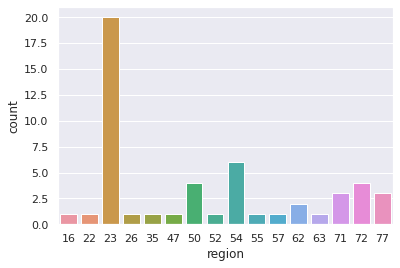

In [92]:
sns.countplot(data=homes_prices, x='region')

<AxesSubplot:xlabel='region', ylabel='objPriceAvg'>

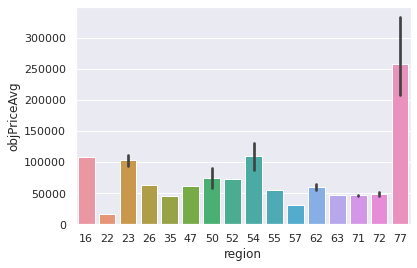

In [93]:
sns.barplot(data=homes_prices, x='region', y='objPriceAvg')

In [94]:
### Full table

In [95]:
homes.shape

(100, 60)

In [96]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            100 non-null    int64  
 1   hobjId                        100 non-null    int64  
 2   pdId                          100 non-null    int64  
 3   developer                     100 non-null    object 
 4   region                        100 non-null    int64  
 5   address                       100 non-null    object 
 6   floorMin                      100 non-null    int64  
 7   floorMax                      100 non-null    int64  
 8   objElemLivingCnt              100 non-null    int64  
 9   objReady100PercDt             100 non-null    object 
 10  wallMaterialShortDesc         100 non-null    object 
 11  objLkFinishTypeDesc           100 non-null    object 
 12  objLkFreePlanDesc             100 non-null    object 
 13  objEle

In [97]:
# Floors by region

In [99]:
floors = homes[['region', 'floorMin', 'floorMax']]

In [100]:
floors.shape

(100, 3)

<AxesSubplot:xlabel='region', ylabel='count'>

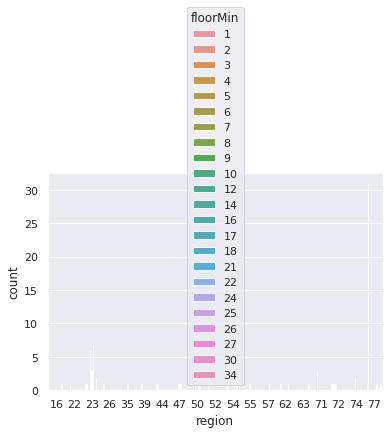

In [101]:
sns.countplot(data=floors, x='region', hue='floorMin')

<AxesSubplot:xlabel='region', ylabel='floorMin'>

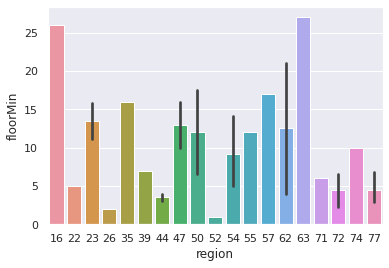

In [102]:
sns.barplot(data=floors, x='region', y='floorMin')

<AxesSubplot:xlabel='region', ylabel='floorMax'>

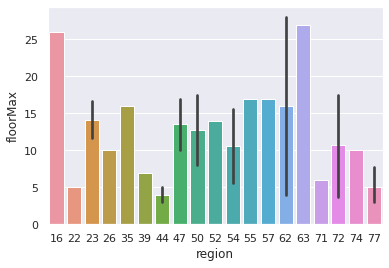

In [103]:
sns.barplot(data=floors, x='region', y='floorMax')

In [104]:
## Average floors??

In [106]:
floors.head(20)

,region,floorMin,floorMax
0,72,4,20
1,72,7,10
2,72,6,12
3,72,1,1
4,26,2,10
5,35,16,16
6,74,10,10
7,74,10,10
8,23,25,25
9,23,25,25


In [107]:
floors['AvgFloors'] = [0]*len(floors)

/tmp/ipykernel_5338/1033145543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floors['AvgFloors'] = [0]*len(floors)


In [108]:
floors.head()

,region,floorMin,floorMax,AvgFloors
0,72,4,20,0
1,72,7,10,0
2,72,6,12,0
3,72,1,1,0
4,26,2,10,0


In [109]:
for i in range(len(floors)):
    avg = (floors['floorMin'].iloc[i] + floors['floorMax'].iloc[i])//2
    floors['AvgFloors'].iloc[i] = avg
    

/tmp/ipykernel_5338/2317002040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floors['AvgFloors'].iloc[i] = avg


In [110]:
floors.head()

,region,floorMin,floorMax,AvgFloors
0,72,4,20,12
1,72,7,10,8
2,72,6,12,9
3,72,1,1,1
4,26,2,10,6


In [111]:
# Avg floors by region

<AxesSubplot:xlabel='region', ylabel='AvgFloors'>

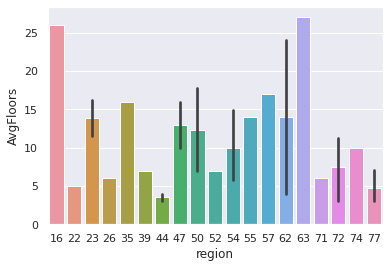

In [112]:
sns.barplot(data=floors, x='region', y='AvgFloors')

In [113]:
## Count homes by region

<AxesSubplot:xlabel='region', ylabel='count'>

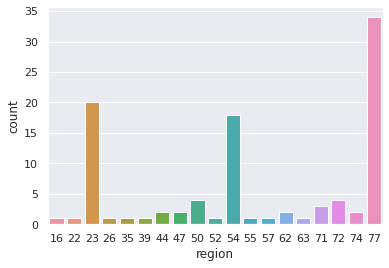

In [115]:
sns.countplot(data=homes, x='region')

In [116]:
#objReady100PercDt

In [117]:
homes_date = homes[['id', 'region', 'objReady100PercDt']]

In [118]:
homes_date.head(10)

,id,region,objReady100PercDt
0,13383,72,2022-12-31
1,13398,72,2024-12-31
2,13397,72,2024-12-31
3,13399,72,2024-12-31
4,36912,26,2022-12-31
5,10891,35,2023-03-31
6,8809,74,2019-03-31
7,8810,74,2019-03-31
8,39176,23,2024-09-30
9,39175,23,2023-06-30


In [121]:
homes_date['objReady100PercDt'].iloc[0]

'2022-12-31'

In [122]:
## Add Year to homes_date

In [126]:
homes_date['Year'] = ['']*len(homes_date) 

/tmp/ipykernel_5338/2017191194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_date['Year'] = ['']*len(homes_date)


In [127]:
for i in range(len(homes_date)):
    homes_date['Year'].iloc[i] = homes_date['objReady100PercDt'].iloc[i][:4]
    

/tmp/ipykernel_5338/4131059989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_date['Year'].iloc[i] = homes_date['objReady100PercDt'].iloc[i][:4]


In [128]:
homes_date.head(10)

,id,region,objReady100PercDt,Year
0,13383,72,2022-12-31,2022
1,13398,72,2024-12-31,2024
2,13397,72,2024-12-31,2024
3,13399,72,2024-12-31,2024
4,36912,26,2022-12-31,2022
5,10891,35,2023-03-31,2023
6,8809,74,2019-03-31,2019
7,8810,74,2019-03-31,2019
8,39176,23,2024-09-30,2024
9,39175,23,2023-06-30,2023


In [129]:
# By region and by year

<AxesSubplot:xlabel='region', ylabel='count'>

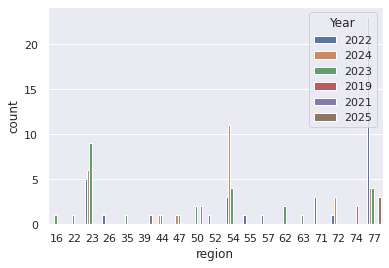

In [131]:
sns.countplot(data=homes_date, x='region', hue='Year')

<AxesSubplot:xlabel='Year', ylabel='count'>

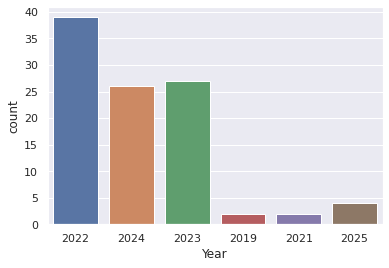

In [132]:
sns.countplot(data=homes_date, x='Year')